In [1]:
#Loaded Needed Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import scipy.optimize as opt 
path ='D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\4-Classification Example_2(Data Reguralization).txt'
data =pd.read_csv(path ,header =None,names =['Test 1','Test 2','Accepted'])
print('The Shape Of Data Is ==> ',data.shape)#The Shape Of Data Is ==>  (118, 3)
print('\t\tThis Data Is \n',data.head(10))
print('==='*30)
print('\t\t Describing Data Is \n',data.describe())
print('==='*30)
#Divided Data To Positive And Negative Data 
positive=data[data['Accepted'].isin([1])]
negative=data[data['Accepted'].isin([0])]
print('The Shape Of Positive Data Is ==> ',positive.shape)#The Shape Of Positive Data Is ==>  (58, 3)
print('\t\tThe Positive Data Is \n',positive.head(10))
print('==='*30)
print('The Shape Of Negative Data Is ==> ',negative.shape)#The Shape Of Negative Data Is ==>  (60, 3)
print('\t\t The Neagtive Data Is \n',negative.head(10))

The Shape Of Data Is ==>  (118, 3)
		This Data Is 
      Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1
		 Describing Data Is 
            Test 1      Test 2    Accepted
count  118.000000  118.000000  118.000000
mean     0.054779    0.183102    0.491525
std      0.496654    0.519743    0.502060
min     -0.830070   -0.769740    0.000000
25%     -0.372120   -0.254385    0.000000
50%     -0.006336    0.213455    0.000000
75%      0.478970    0.646563    1.000000
max      1.070900    1.108900    1.000000
The Shape Of Positive Data Is ==>  (58, 3)
		The Positive Data Is 
      Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         

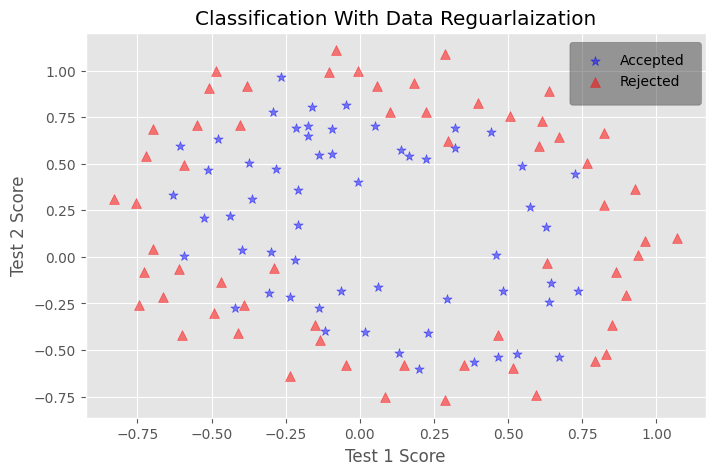

In [5]:
#Make Plots For The Data (Positive & Negative) Using Scatter
plt.style.use('ggplot')
fig,ax=plt.subplots(figsize=(8,5))
ax.set(title='Classification With Data Reguarlaization',xlabel='Test 1 Score',ylabel='Test 2 Score')
ax.scatter(positive['Test 1'],positive['Test 2'],color='blue',marker='*',alpha=0.5,s=50,label='Accepted')
ax.scatter(negative['Test 1'],negative['Test 2'],color='red',marker='^',s=50,alpha=0.5,label='Rejected')
ax.legend(loc ='upper right',frameon=True,fancybox=True,framealpha=0,borderpad=1,shadow=True)

In [22]:
path ='D:\\Programming\\Machine Learning Projects\\My Projects\\Data\\4-Classification Example_2(Data Reguralization).txt'
data =pd.read_csv(path ,header =None,names =['Test 1','Test 2','Accepted'])
#Seperated My Data To X1 7 X2 , X1 ==> Represented Test 1 , X2 ==> Represented Test 2
degree= 5 
x1=data['Test 1']
x2=data['Test 2']
print('\t\tThe X1 Data Is \n',x1.head(10))
print('==='*30)
print('\t\tThe X2 Data Is \n',x2.head(10))
print('==='*30)
#==========================================================
#Make Insert Ones To My Data 
data.insert(3,'Ones',1)
print('\t\tThe New Data Is \n',data.head(10))
print('****'*40)
#Make For Loop To Make Some Equations For Data 
for i in range (1,degree):
    for j in range (0,i):
        data['F' +str(i) + str(j)] = np.power(x1,i-j) * np.power(x2,j)
print('\t\tData After Make Equations Is \n',data.head(10))
print('****'*40)
print('The Shape Data After Make Equations Is ==> ',data.shape)#The Shape Data After Make Equations Is ==>  (118, 14)
print('===='*40)
#Make Drop Cols [Test 1 & Test 2] from data because not using 
data.drop('Test 1' , axis = 1 , inplace = True )
data.drop('Test 2' , axis = 1 , inplace = True )
print('\t\tThe Data After Making Drop [Test 1 & Test 2 ] Is \n',data.head(10))
print('===='*40)

		The X1 Data Is 
 0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4   -0.513250
5   -0.524770
6   -0.398040
7   -0.305880
8    0.016705
9    0.131910
Name: Test 1, dtype: float64
		The X2 Data Is 
 0    0.699560
1    0.684940
2    0.692250
3    0.502190
4    0.465640
5    0.209800
6    0.034357
7   -0.192250
8   -0.404240
9   -0.513890
Name: Test 2, dtype: float64
		The New Data Is 
      Test 1    Test 2  Accepted  Ones
0  0.051267  0.699560         1     1
1 -0.092742  0.684940         1     1
2 -0.213710  0.692250         1     1
3 -0.375000  0.502190         1     1
4 -0.513250  0.465640         1     1
5 -0.524770  0.209800         1     1
6 -0.398040  0.034357         1     1
7 -0.305880 -0.192250         1     1
8  0.016705 -0.404240         1     1
9  0.131910 -0.513890         1     1
****************************************************************************************************************************************************************
		Data After Make Equatio

In [31]:
#Create Sigmoid Functio Because To Calculate The Expected Values
def sigmoid(var) : return 1 / (1 + np.exp(-var))
#================================================================
#Create The Cost Function Because To Caclulate The Cost Reguraliztion 
def Cost_Reg(theta , x , y , lr ):
    theta_values = np.matrix(theta)
    x_values = np.matrix(x)
    y_values = np.matrix(y)
    first = np.multiply(-y_values , np.log(sigmoid(x_values * theta_values.T)))
    second = np.multiply((1 - y_values) , np.log(1 - sigmoid(x_values * theta_values.T)))
    reg = ( lr / 2 * len(x_values)) * np.sum (np.power (theta_values[ : , 1 : theta_values.shape[1]] , 2))
    return np.sum ( first - second) / len (x_values) + reg

In [62]:
#Seperate Training Data & Target Data 
cols =data.shape[1]
print('The Columns Is ==> ',cols , ' columns') # The Columns Is ==>  12  columns
x_training_data = data.iloc[: , 0 : cols]
print('\t\t The Training Data Is \n',x_training_data.head(10))
print('=='*50)
y_target_data =data.iloc[: , 0 : 1]
print('\t\t The Target Data Is \n',y_target_data.head(10))
print('**'*50)
#Covert Training Data & Target Data To Matrix 
xm=np.array(x_training_data.values)
ym=np.array(y_target_data.values)
theta = np.zeros(x_training_data.shape[1])
print('\t\tThe Training Data After Convert To Matrix Is \n',xm[0:10,:])
print('==='*40)
print('\t\t The Target Data After Convert To Matrix Is \n',ym[0:10,:])
print('==='*40)
print('The Theta Values Is ==> ',theta)#The Theta Values Is ==>  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
#Recall The Cost Function 
#Learning Rate Is Same Alpha
learning_rate =0.0001
regrualized_cost = Cost_Reg(theta ,xm , ym , learning_rate)
print('The Reguralized Cost Is ==> ',regrualized_cost)#The Reguralized Cost Is ==>  0.6931471805599454

The Columns Is ==>  12  columns
		 The Training Data Is 
    Accepted  Ones       F10       F20       F21       F30       F31       F32  \
0         1     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1         1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2         1     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3         1     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4         1     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5         1     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6         1     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7         1     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8         1     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9         1     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0 

In [33]:
#Create Graient Descent Reguralization 
def gradient_descent_reg(theta , x , y , learningrate):
    theta_values = np.matrix(theta)
    x_values = np.matrix(x)
    y_values = np.matrix(y)
    parameters = int(theta_values.ravel().shape[1])
    grad = np.zeros(parameters)
    error=sigmoid(x_values * theta_values.T) - y_values
    for i in range(parameters):
        term = np.multiply(error , x_values[: , i])
        if( i == 0) : grad[i] = np.sum(term) / len (x_values)
        else : grad[i] = (np.sum(term) / len(x_values)) + ((learningrate / len(x_values) ) * theta_values[: , i] )
    return grad

In [63]:
#Cost Minimum To Use Scipy Function 
result = opt.fmin_tnc(func = Cost_Reg , x0 = theta ,fprime=gradient_descent_reg ,args = (xm,ym,learning_rate))
print('The Result Is ==> ',result)
print('****'*30)
#Calculate The Cost Function After Make Optimizing for Minimum Vakues Of Theta 
cost_after_optimize=Cost_Reg(result[0],xm,ym,learning_rate)
print('The Value Of Cost After Optimize Is = ',cost_after_optimize)
#The Value Of Cost After Optimize Is =  0.20349770158947447
print('***' *50)
#Make Function To Calculate Accuracy 
def Predict_Value (Theta_1 ,Num_1):
    Probability_Value = sigmoid( Num_1 * Theta_1.T)
    return [ 1 if Num_1 >= 0.5 else 0 for Num_1 in Probability_Value]
#======================================================================================================
#Calculate The Accuracy Value 
Theta_Minimize = np.matrix(result[0])
Predictions_Values = Predict_Value(Theta_Minimize ,xm)
print('\t\tThe New Prdictions Values Is \n',Predictions_Values)
print('***'*50)
Correct_Value_Predict = [1 if (( a == 1 and b == 1 ) or ( a == 0 and b == 0 )) else 0 for (a,b) in zip (Predictions_Values , ym)]
accuracy_Prdict = (sum(map(float ,Correct_Value_Predict)) % len (Correct_Value_Predict))
print('The Accuracy Value Is ==> {0}%' .format(accuracy_Prdict))

The Result Is ==>  (array([ 6.32911839, -2.87052706,  0.34183199, -1.15539073, -0.15025548,
        0.11943229, -0.20975989, -0.11902833, -0.69718124,  0.0150634 ,
       -0.42825356,  0.01156358]), 89, 1)
************************************************************************************************************************
The Value Of Cost After Optimize Is =  0.09883827455456391
******************************************************************************************************************************************************
		The New Prdictions Values Is 
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
***************************************************************************